In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from google.colab import drive

drive.mount('/content/gdrive/')
demographic_data = pd.read_csv('/content/gdrive/My Drive/KPMG/CustomerDemographic.csv', index_col='customer_id')
address_data = pd.read_csv('/content/gdrive/My Drive/KPMG/Demographic.csv', index_col='customer_id')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
demographic = demographic_data[['gender',	'DOB',	'job_industry_category',	'owns_car', 'wealth_segment',	'past_3_years_bike_related_purchases']]
demographic['DOB'] = pd.to_datetime(demographic.DOB)

demographic['AGE'] = ((pd.datetime.datetime.now()- demographic.DOB)).dt.days

demographic['AGE'] = np.floor(demographic.AGE / 365)
demographic = demographic[demographic.AGE <= 100]

demographic.sort_values('customer_id', inplace = True)
demographic.dropna(how = 'any', inplace = True)

demographic.gender.replace('F', 'Female', inplace = True)
demographic.gender.replace('Femal', 'Female', inplace = True)
demographic.gender.replace('M', 'Male', inplace = True)

demographic = demographic[['AGE', 'gender',	'job_industry_category',	'owns_car', 'wealth_segment',	'past_3_years_bike_related_purchases']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [3]:
state = pd.DataFrame(address_data.state)

state.state.replace('New South Wales', 'NSW', inplace = True)
state.state.replace('Victoria', 'VIC', inplace = True)

In [4]:
data = pd.merge(demographic, state, left_on='customer_id', right_on='customer_id')

age_bucket = [0, 20, 40, 60, 80, 100]
age_groups = ['Age : 0 - 20', 'Age : 21 - 40', 'Age : 41 - 60', 'Age : 61 - 80', 'Age : 81 - 100']
data['Age_Groups'] = pd.cut(data['AGE'], age_bucket, labels=age_groups)

data = data[['Age_Groups', 'gender', 'job_industry_category', 'state',  'owns_car', 'wealth_segment', 'past_3_years_bike_related_purchases']]

Age : 0 - 20        86
Age : 21 - 40     1205
Age : 41 - 60     1649
Age : 61 - 80      311
Age : 81 - 100       2
Name: Age_Groups, dtype: int64


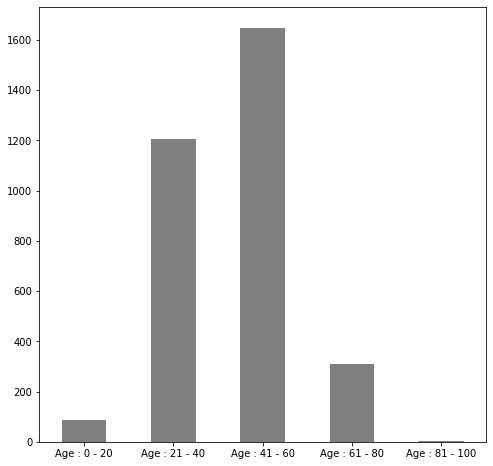

In [5]:
print (data.Age_Groups.value_counts(sort = False))
data.Age_Groups.value_counts(sort = False).plot(figsize = (8, 8), kind = 'bar', color = ('grey'), rot = 0)

Male      1565
Female    1688
Name: gender, dtype: int64


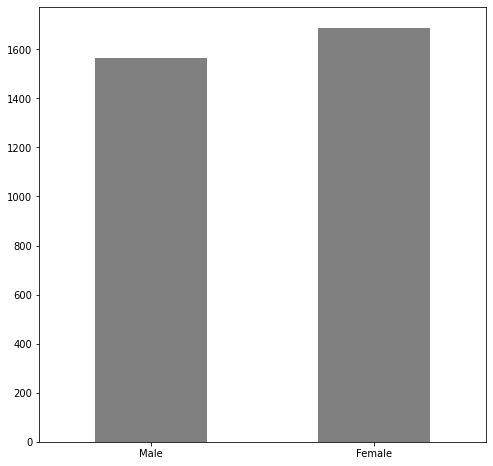

In [6]:
print (data.gender.value_counts(sort = False))
data.gender.value_counts(sort = False).plot(figsize = (8, 8), kind = 'bar', color = ('grey'), rot = 0)

Retail                358
Entertainment         136
IT                    150
Financial Services    766
Telecommunications     72
Argiculture           113
Manufacturing         796
Health                596
Property              266
Name: job_industry_category, dtype: int64


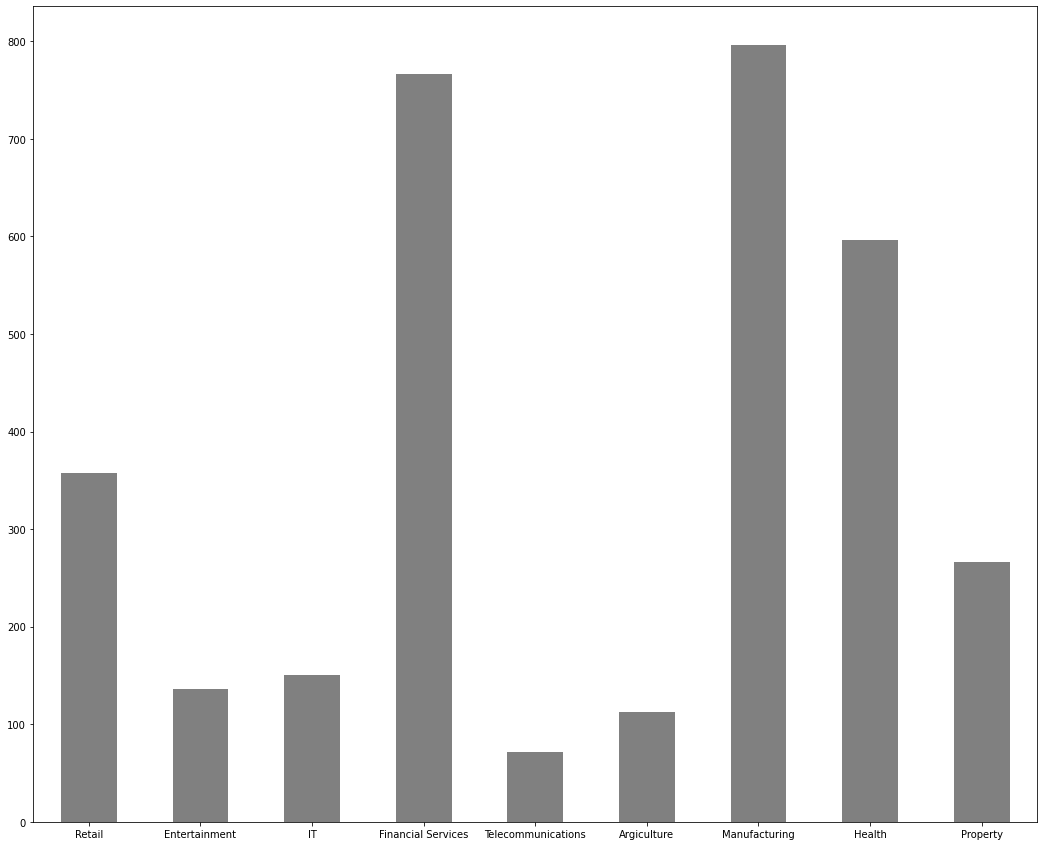

In [7]:
print (data.job_industry_category.value_counts(sort = False))
data.job_industry_category.value_counts(sort = False).plot(figsize = (18, 15), kind = 'bar', color = ('grey'), rot = 0)

NSW    1741
QLD     676
VIC     836
Name: state, dtype: int64


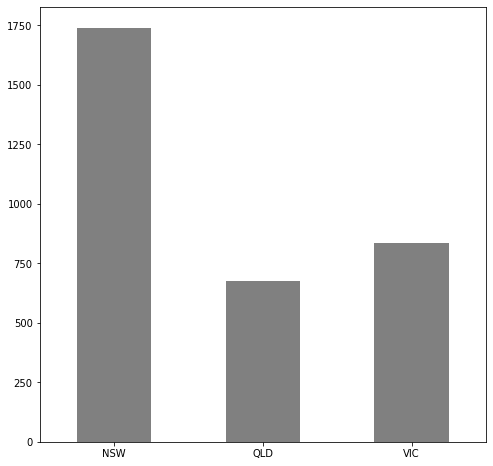

In [8]:
print (data.state.value_counts(sort = False))
data.state.value_counts(sort = False).plot(figsize = (8, 8), kind = 'bar', color = ('grey'), rot = 0)

No     1596
Yes    1657
Name: owns_car, dtype: int64


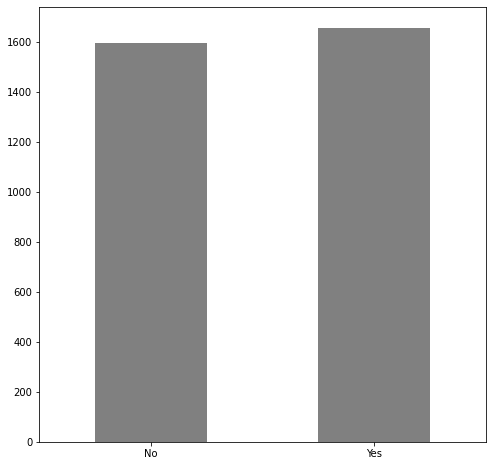

In [9]:
print (data.owns_car.value_counts(sort = False))
data.owns_car.value_counts(sort = False).plot(figsize = (8, 8), kind = 'bar', color = ('grey'), rot = 0)

High Net Worth        826
Affluent Customer     794
Mass Customer        1633
Name: wealth_segment, dtype: int64


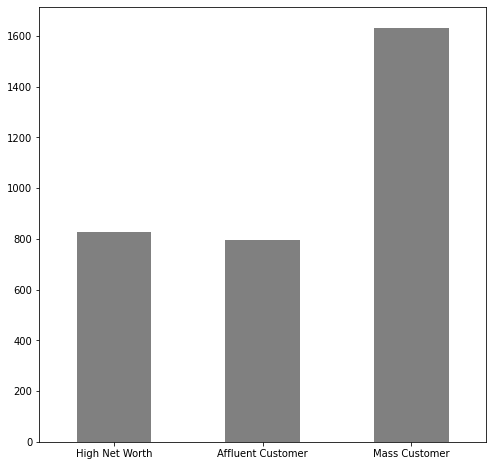

In [10]:
print (data.wealth_segment.value_counts(sort = False))
data.wealth_segment.value_counts(sort = False).plot(figsize = (8, 8), kind = 'bar', color = ('grey'), rot = 0)

In [19]:
Data_Grouped = data.groupby(['Age_Groups', 'gender', 'owns_car', 'job_industry_category']).wealth_segment.value_counts()

Data_Grouped.to_excel('/content/gdrive/My Drive/KPMG/Data_Grouped.xlsx')

Data_Grouped.head()

Age_Groups    gender  owns_car  job_industry_category  wealth_segment   
Age : 0 - 20  Female  No        Financial Services     Affluent Customer    3
                                                       Mass Customer        3
                                Health                 Mass Customer        2
                                                       Affluent Customer    1
                                IT                     Affluent Customer    2
Name: wealth_segment, dtype: int64

In [22]:
Data = data[['Age_Groups', 'gender', 'owns_car', 'job_industry_category', 'wealth_segment', 'state']]

Data.to_excel('/content/gdrive/My Drive/KPMG/Data.xlsx')

Data.head()

,Age_Groups,gender,owns_car,job_industry_category,wealth_segment,state
customer_id,,,,,,
1,Age : 61 - 80,Female,Yes,Health,Mass Customer,NSW
2,Age : 21 - 40,Male,Yes,Financial Services,Mass Customer,NSW
4,Age : 41 - 60,Male,No,IT,Mass Customer,QLD
6,Age : 41 - 60,Male,Yes,Retail,High Net Worth,VIC
7,Age : 41 - 60,Female,Yes,Financial Services,Affluent Customer,NSW


In [12]:
data.groupby(['Age_Groups']).past_3_years_bike_related_purchases.sum()

Age_Groups
Age : 0 - 20       4111
Age : 21 - 40     61163
Age : 41 - 60     79361
Age : 61 - 80     14729
Age : 81 - 100      123
Name: past_3_years_bike_related_purchases, dtype: int64

In [13]:
data.groupby(['gender']).past_3_years_bike_related_purchases.sum()

gender
Female    81008
Male      78479
Name: past_3_years_bike_related_purchases, dtype: int64

In [14]:
data.groupby(['job_industry_category']).past_3_years_bike_related_purchases.sum()

job_industry_category
Argiculture            5945
Entertainment          6320
Financial Services    37115
Health                29856
IT                     7352
Manufacturing         39121
Property              13233
Retail                17301
Telecommunications     3244
Name: past_3_years_bike_related_purchases, dtype: int64

In [15]:
data.groupby(['state']).past_3_years_bike_related_purchases.sum()

state
NSW    85962
QLD    33405
VIC    40120
Name: past_3_years_bike_related_purchases, dtype: int64

In [16]:
data.groupby(['owns_car']).past_3_years_bike_related_purchases.sum()

owns_car
No     78242
Yes    81245
Name: past_3_years_bike_related_purchases, dtype: int64

In [17]:
data.groupby(['wealth_segment']).past_3_years_bike_related_purchases.sum() 

wealth_segment
Affluent Customer    38976
High Net Worth       39655
Mass Customer        80856
Name: past_3_years_bike_related_purchases, dtype: int64